

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

5) Linear Regression

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed
import numpy as np
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon,shapiro
from statsmodels.stats.power import ttest_power

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [7]:
t_statistic, p_value = ttest_ind(GPU1, GPU2)
print(t_statistic, p_value)

[-2.62762951] [0.01379428]


P value is less than 0.05 Hence this null Hypothesis is rejected.

## Question 2 

He is trying a third GPU - GPU3.

In [9]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [10]:
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print(t_statistic, p_value)

[-1.49889438] [0.14509211]


P Value is > 0.05 hence we fail to reject null hypothesis

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [20]:
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

#### Answer:

In [22]:
levene(e1,e2,e3)

LeveneResult(statistic=array([2.67417257]), pvalue=array([0.12259793]))

If P values is > 0.05 .All the variance are equal.

In [23]:
f, p = f_oneway(e1,e2,e3)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')


One-way ANOVA
F value: [2.51357623]
P value: [0.13574645] 



P value is > 0.05 hence there is no significant difference between the means of each group.

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type 1 error is generally called Alpha error. This occurs when in reality null hypothesis is true but we reject that data. Usually Alpha error is 5 %

## Question 5 

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


The probability of TypeI error is only impacted by your choice of the confidence level.It is inversly propotional to Confidence level.for e.g 95 % is confidence level - TypeI error is 5 %. IF 99% is confidence level then TypeI error reduces to 1%
The probability of TypeII increases when confidence level is high

## Question 6 

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

H0:New GPU is no more effective than the older model
HA : New GPU is not effective

Since he chose the old GPU which has type 1 error which means we have rejected the hypothesis though its true in reality. The New GPU is effective


## Question 7 

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

GPU New is more effective but he selected old GPU

# Linear Regression


# Simple Linear Regression

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [87]:
city = pd.read_csv('bigcity.csv')
city.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input and target variables into X and Y.
Hint: You can shape function to get the size of the dataframe

In [89]:
city.info()

Y = city[['u']]
X = city[['x']]

X.shape, Y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Unnamed: 0    49 non-null int64
u             49 non-null int64
x             49 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


((49, 1), (49, 1))

## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [90]:
#Y.isna() , X.isna()

X.isnull().values.any() , Y.isnull().values.any()

Correlation = city[['u','x']].corr()
Correlation

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


u and X are highly correlated.

### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [137]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((39, 1), (10, 1), (39, 1), (10, 1))

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [138]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print('Coefficients: \n ', lm.coef_)
print('Intercept: \n ', lm.intercept_)

Coefficients: 
  [[0.83058823]]
Intercept: 
  [-3.34932007]


# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

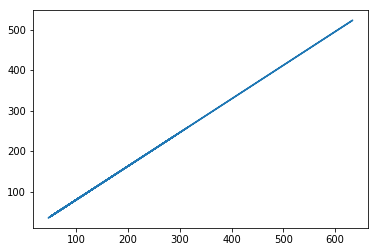

In [139]:
c = lm.intercept_
m = lm.coef_
yx = (m * X_train) + c

plt.plot(X_train,yx)



# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [143]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r_squared = metrics.r2_score(y_test,predictions)

r_squared

MAE: 13.675239587186496
MSE: 472.45214517322904
RMSE: 21.735964325817914


0.9708688171558285

## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [144]:
lm.score(X_test,y_test)

0.9708688171558285

In [145]:
lm.score(X_train,y_train)

0.9592856339376239